# Self-Organizing Maps of Handwritten Digits

This is an exercise to gain familiarity with the applications and functions of self-organizing maps (SOMs). The scikit-learn package for SOMs is applied to a MNIST database of handwritten digits (shown below) to visualize a reduction in dimensionality from 784 features to 2. The goal of this exercise is to explore the visualization and predictive power of the SOM algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn_som.som import SOM
from sklearn.datasets import fetch_openml

In [2]:
# import the data and explore it
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
data = mnist['data']
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, we see that there are 70,000 data points (as mentioned in the description) across 784 dimensions (one dimension for each pixel of a 28x28 image). We can take the suggestion from the author and separate this data set into 6 parts for training to 1 part for testing. We will start with 6,000 training data points to 1,000 testing data points.

In [5]:
train = np.array(data[:6000])
test = np.array(data[6000:7000])
print("Training data set length:", len(train))
print("Testing data set length:", len(test))

Training data set length: 6000
Testing data set length: 1000


Examining the 'target' key in the data set shows us an array of integers (as character types) that label the data with the target of the handwritten numbers. The 'target' array and the 'data' array are matched by indices.

In [6]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Since we separated the data into a training and testing data set, we should also separate the target data.

In [7]:
train_target = np.array(mnist['target'][:6000])
test_target = np.array(mnist['target'][6000:7000])
print("Training target data set length:", len(train_target))
print("Testing target data set length:", len(test_target))

Training target data set length: 6000
Testing target data set length: 1000


Now we will create an SOM object with a 10x10 output grid and 784 dimensional input. Then we will fit the training data to the SOM model, transform it, and predict a class for each data point. Because SOMs are unsupervised machine learning algorithms, the classes are unlabeled. Since this SOM uses a fixed grid, there are 100 classes to which each point is assigned.

In [36]:
digit_som = SOM(m=10, n=10, dim=784)
digit_som.fit(train)

In [37]:
digit_map = digit_som.transform(train)

In [38]:
digit_prediction = digit_som.predict(train)

To label the classes after they have been organized by the algorithm, we can inspect each of the 100 classes and find the corresponding labels in the training data. Then we can assign the most commonly occuring label to the class. There are a total of 10 labels, so each of the 100 classes defined by the algorithm will be assigned 1 of the 10 labels.

In [39]:
# find the target values for each of the 100 predicted values
class_labels = []
for i in range(100):
    som_predicition_list = {}
    for j in train_target[digit_prediction == i]:
        if j not in som_predicition_list:
            som_predicition_list[j] = 0
        som_predicition_list[j] += 1
    # assign the predicted label by finding the mode of the predicted values
    class_labels.append(int(max(som_predicition_list, key=som_predicition_list.get)))

To visualize how the data was organized, we can map the 100 classes in a 10x10 grid, then choose 1 of 10 colors for each of the 10 labels. We should expect to see several adjacent grid points with the same color forming labeled regions on the map.

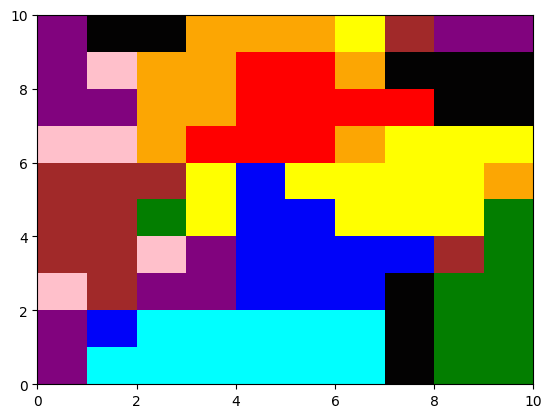

In [44]:
# create grid coordinates and colors to represent each of the 10 labels
x, y = np.meshgrid(np.arange(11), np.arange(11))
z = np.array(class_labels).reshape(10, 10)
custom_colors = ['red', 'green', 'blue', 'yellow', 'purple',
                'orange', 'cyan', 'brown', 'black', 'pink']

# assign the colors to the predicted labels and plot
fig, ax = plt.subplots()
cmap = colors.LinearSegmentedColormap.from_list("", custom_colors)
ax.pcolormesh(x, y, np.flipud(z), cmap=cmap)  # z is flipped to match the orientation of the image grid

The handwritten digits are represented in the map by colors from the custom color map in order:

- Red: 0
- Green: 1
- Blue: 2
- Yellow: 3
- Magenta: 4
- Orange: 5
- Cyan: 6
- Brown: 7
- Black: 8
- Pink: 9

To get a better visualization of these categories, let's inspect the images assigned to each node and take an average of the images by pixel value. Then we can create a grid similar to the one above, but with representations of the data at each node.

In [41]:
# for each node, create an average of all the images closest to it
node_image = []
for i in range(100):
    # create a node image variable for each node
    node_image.append([0]*len(train[0]))
    # find all images closest to the node
    for img in train[digit_prediction == i]:
        # add each pixel of each image together
        for j, pixel in enumerate(img):
            node_image[i][j] += pixel
    # skip empty nodes
    if not len(train[digit_prediction == i]):
        node_image[i] = np.array(node_image[i])
        continue
    # average out each pixel and make image a NumPy array
    node_image[i] = np.array(node_image[i]) / len(train[digit_prediction == i])

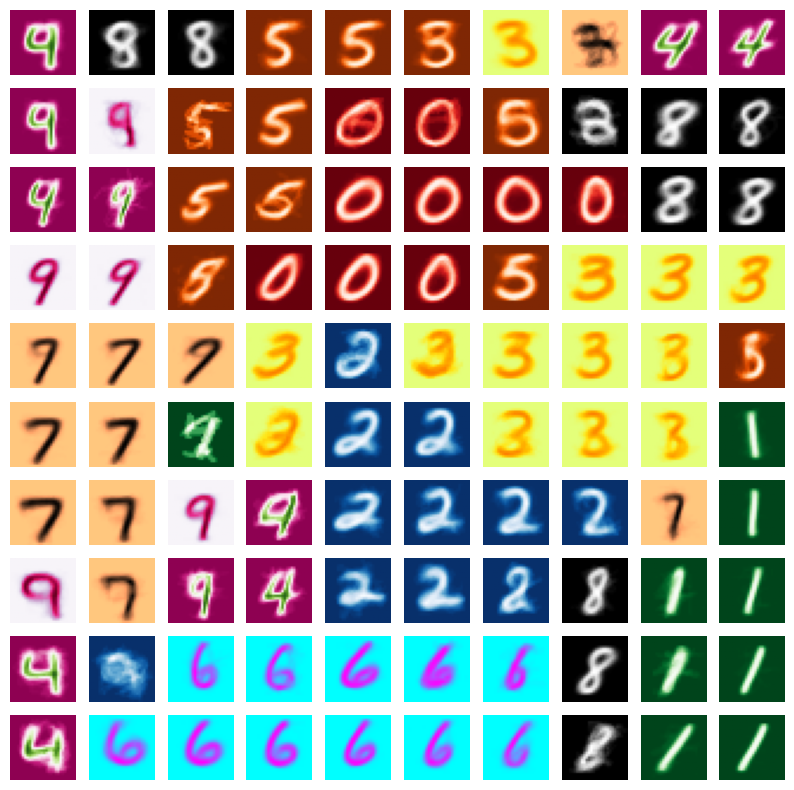

In [42]:
# redefine colors to most similar cmap gradients
gradient_colors = ['Reds_r', 'Greens_r', 'Blues_r', 'Wistia',
                 'PiYG', 'Oranges_r', 'cool', 'copper_r',
                 'Grays_r', 'PuRd', 'Grays']

plt.figure(figsize=(10,10))
# plot average images for each of the 100 nodes
for i in range(100):
    plt.subplot(10,10,i+1)    # the number of images in the grid is 10*10 (100)
    plt.imshow(node_image[i].reshape(28, 28), cmap=gradient_colors[z.reshape(100)[i]])
    plt.axis('off')

plt.show()

The digits are represented in the map by colors from the custom color map in order:

- Red/white: 0
- Green/white: 1
- Blue/white: 2
- Yellow: 3
- Purple/green: 4
- Orange/white: 5
- Cyan/magenta: 6
- Brown/black: 7
- Black/white: 8
- Pink: 9

So we can see that similar images are grouped together by the algorithm.

Since we assigned labels for each class created by the SOM, we can measure the accuracy of the labels by comparing the class assigned to each data point (and associated label) to their actual labels. We'll start by assessing the accuracy of the representation of the test data.

In [45]:
count = 0
for i in range(len(digit_prediction)):
    if int(train_target[i]) == class_labels[digit_prediction[i]]:
        count += 1
print("{}% of test data accurately represented".format(count*100 / len(digit_prediction)))

79.81666666666666% of test data accurately represented


Now we will use the test data to assess the accuracy of the self-organization.

In [46]:
# make predictions on test data
digit_prediction = digit_som.predict(test)

# count accurate predictions
count = 0
for i in range(len(digit_prediction)):
    if int(test_target[i]) == class_labels[digit_prediction[i]]:
        count += 1
print("{}% of test data accurately represented".format(count*100 / len(digit_prediction)))

79.0% of test data accurately represented
